# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muhammad Dimas Faza
- **Email:** muhammad.dimas.faza-2021@fst.unair.ac.id
- **ID Dicoding:** ygpunyano10

## Menentukan Pertanyaan Bisnis

### PERTANYAAN
- 1. Bagaimana kondisi cuaca memengaruhi jumlah peminjaman sepeda?
- 2. Bagaimana distribusi jumlah sewa sepeda berdasarkan bulan?

## Import Semua Packages/Library yang Digunakan

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [10]:
# Membaca dataset
hour_df = pd.read_csv("hour.csv")

# Menampilkan bentuk (shape) dataset
print("Bentuk dataset adalah", hour_df.shape)

# Menampilkan lima baris pertama dataset
hour_df.head()

Bentuk dataset adalah (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
# Membaca dataset
day_df = pd.read_csv("day.csv")

# Menampilkan bentuk (shape) dataset
print("Bentuk dataset adalah", day_df.shape)

# Menampilkan lima baris pertama dataset
day_df.head()

Bentuk dataset adalah (731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
# Menghitung jumlah baris pada DataFrame hour
# jumlah_baris_hour = hour.shape[0]
# print(f"Jumlah baris di DataFrame hour adalah {jumlah_baris_hour}")

# Menghitung jumlah baris pada DataFrame day
jumlah_baris_day = day_df.shape[0]
print(f"Jumlah baris di DataFrame daya dalah {jumlah_baris_day}")

Jumlah baris di DataFrame daya dalah 731


###Menggabungkan data dalam beberapa dataframe

In [13]:
# Menggabungkan DataFrame day dan hour berdasarkan kolom 'dteday' dengan metode inner join
bike_sharing = day_df.merge(hour_df, on='dteday', how='inner', suffixes=('_daily', '_hourly'))

# Menampilkan bentuk (shape) dari DataFrame hasil gabungan
print("Bentuk DataFrame setelah penggabungan adalah", bike_sharing.shape)

# Menampilkan baris yang memiliki nilai null pada kolom 'dteday'
missing_dates = bike_sharing.loc[bike_sharing["dteday"].isnull()]
print("Baris dengan nilai null pada kolom 'dteday'adalah")
print(missing_dates)

# Menampilkan lima baris pertama DataFrame hasil gabungan
bike_sharing.head()

Bentuk DataFrame setelah penggabungan adalah (17379, 32)
Baris dengan nilai null pada kolom 'dteday'adalah
Empty DataFrame
Columns: [instant_daily, dteday, season_daily, yr_daily, mnth_daily, holiday_daily, weekday_daily, workingday_daily, weathersit_daily, temp_daily, atemp_daily, hum_daily, windspeed_daily, casual_daily, registered_daily, cnt_daily, instant_hourly, season_hourly, yr_hourly, mnth_hourly, hr, holiday_hourly, weekday_hourly, workingday_hourly, weathersit_hourly, temp_hourly, atemp_hourly, hum_hourly, windspeed_hourly, casual_hourly, registered_hourly, cnt_hourly]
Index: []

[0 rows x 32 columns]


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [14]:
day_df.isnull().sum()
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
# Menampilkan informasi tentang DataFrame hour
print("Informasi DataFrame hour adalah")
hour_df.info()

# Menampilkan informasi tentang DataFrame day
print("\nInformasi DataFrame day adalah")
day_df.info()

# Menampilkan informasi tentang DataFrame bike_sharing
print("\nInformasi DataFrame bike_sharing adalah")
bike_sharing.info()

Informasi DataFrame hour adalah
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Informasi DataFr

### Menilai Data

In [16]:
# Menampilkan bentuk (shape) DataFrame bike_sharing
print(f"Bentuk DataFrame bike_sharing adalah {bike_sharing.shape}")

# Menampilkan jumlah nilai null pada setiap kolom DataFrame bike_sharing
null_counts = bike_sharing.isnull().sum()
print("Jumlah nilai null pada setiap kolom adalah")
print(null_counts)


Bentuk DataFrame bike_sharing adalah (17379, 32)
Jumlah nilai null pada setiap kolom adalah
instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64


In [17]:
# Menampilkan jumlah duplikasi dalam DataFrame bike_sharing
jumlah_duplikasi = bike_sharing.duplicated().sum()
print(f"Jumlah duplikasi adalah {jumlah_duplikasi}")

# Menampilkan ringkasan statistik DataFrame bike_sharing
print("\nRingkasan statistik DataFrame bike_sharing adalah")
bike_sharing.describe()


Jumlah duplikasi adalah 0

Ringkasan statistik DataFrame bike_sharing adalah


,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [18]:
# Membaca dataset day.csv dan hour.csv
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# Menghapus baris dengan nilai null pada DataFrame day_df
day_df_cleaned = day_df.dropna(axis=0).reset_index(drop=True)

# Menghapus baris dengan nilai null pada DataFrame hour_df
hour_df_cleaned = hour_df.dropna(axis=0).reset_index(drop=True)

# Menampilkan informasi setelah penghapusan nilai null
print("Informasi DataFrame day setelah penghapusan nilai null adalah")
print(day_df_cleaned.info())

print("\nInformasi DataFrame hour setelah penghapusan nilai null adalah")
print(hour_df_cleaned.info())


Informasi DataFrame day setelah penghapusan nilai null adalah
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Informasi DataFrame hour 

## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
bike_sharing.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [20]:
 # Membuat fungsi untuk menghitung rentang (range)
def hitung_rentang(x):
    return x.max() - x.min()

# Grouping berdasarkan musim dan menghitung beberapa statistik pada kolom tertentu
bike_sharing_stats = bike_sharing.groupby(by="season_hourly").agg({
    "workingday_hourly": "count",  # Jumlah penyewa pada hari kerja berdasarkan musim
    "windspeed_hourly": ["max", "min", "mean", hitung_rentang]  # Menggunakan fungsi kustom hitung_rentang
}).sort_values(by=("workingday_hourly", "count"), ascending=False)

# Menampilkan hasil
print(bike_sharing_stats)

              workingday_hourly windspeed_hourly                              
                          count              max  min      mean hitung_rentang
season_hourly                                                                 
3                          4496           0.8507  0.0  0.171593         0.8507
2                          4409           0.7164  0.0  0.203410         0.7164
1                          4242           0.8060  0.0  0.215107         0.8060
4                          4232           0.6418  0.0  0.170819         0.6418


In [21]:
# Membuat fungsi untuk menghitung rentang (range)
def hitung_rentang(x):
    return x.max() - x.min()

# Grouping berdasarkan musim dan menghitung beberapa statistik pada kolom tertentu
bike_sharing_stats_daily = bike_sharing.groupby(by="season_daily").agg({
    "workingday_daily": "count",  # Jumlah penyewa pada hari kerja berdasarkan musim
    "windspeed_daily": ["max", "min", "mean", hitung_rentang]  # Menggunakan fungsi kustom hitung_rentang
}).sort_values(by=("workingday_daily", "count"), ascending=False)

# Menampilkan hasil
print(bike_sharing_stats_daily)


             workingday_daily windspeed_daily                      \
                        count             max       min      mean   
season_daily                                                        
3                        4496        0.375617  0.064071  0.171593   
2                        4409        0.388067  0.065929  0.203410   
1                        4242        0.507463  0.045408  0.215107   
4                        4232        0.422275  0.022392  0.170819   

                             
             hitung_rentang  
season_daily                 
3                  0.311546  
2                  0.322138  
1                  0.462055  
4                  0.399883  


In [22]:
# Menghitung jumlah nilai unik pada kolom 'cnt_daily' berdasarkan 'weathersit_daily'
unik_per_weathersit_daily = bike_sharing.groupby("weathersit_daily")["cnt_daily"].nunique()

# Menampilkan hasil
print("Jumlah nilai unik pada kolom 'cnt_daily' berdasarkan 'weathersit_daily':")
print(unik_per_weathersit_daily)

Jumlah nilai unik pada kolom 'cnt_daily' berdasarkan 'weathersit_daily':
weathersit_daily
1    451
2    243
3     21
Name: cnt_daily, dtype: int64


In [23]:
# Menghitung jumlah nilai unik pada kolom 'cnt_daily' berdasarkan 'mnth_daily'
unik_per_mnth_daily = bike_sharing.groupby("mnth_daily")["cnt_daily"].nunique()

# Menampilkan hasil
print("Jumlah nilai unik pada kolom 'cnt_daily' berdasarkan 'mnth_daily':")
print(unik_per_mnth_daily)

Jumlah nilai unik pada kolom 'cnt_daily' berdasarkan 'mnth_daily':
mnth_daily
1     62
2     57
3     60
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: cnt_daily, dtype: int64


In [24]:
# Mengambil kolom-kolom numerik yang akan dihitung korelasinya
kolom_numerik = ["holiday_daily", "weekday_daily", "workingday_daily", "weathersit_daily", "temp_daily", "atemp_daily", "season_daily", "windspeed_daily", "cnt_daily", "casual_daily", "registered_daily"]

# Menghitung korelasi antar kolom numerik
korelasi = bike_sharing[kolom_numerik].corr()

# Menampilkan matriks korelasi
print("Matriks Korelasinya adalah")
print(korelasi)


Matriks Korelasinya adalah
                  holiday_daily  weekday_daily  workingday_daily  \
holiday_daily          1.000000      -0.102088         -0.252471   
weekday_daily         -0.102088       1.000000          0.035955   
workingday_daily      -0.252471       0.035955          1.000000   
weathersit_daily      -0.033653       0.035082          0.057122   
temp_daily            -0.028856      -0.001894          0.058460   
atemp_daily           -0.032770      -0.009333          0.057839   
season_daily          -0.009585      -0.002335          0.013743   
windspeed_daily        0.006319       0.018226         -0.018746   
cnt_daily             -0.070344       0.064204          0.068216   
casual_daily           0.054134       0.058700         -0.517844   
registered_daily      -0.111327       0.053629          0.314491   

                  weathersit_daily  temp_daily  atemp_daily  season_daily  \
holiday_daily            -0.033653   -0.028856    -0.032770     -0.009585   
we

## Visualization & Explanatory Analysis


### Pertanyaan 1:
- Bagaimana kondisi cuaca memengaruhi jumlah peminjaman sepeda?


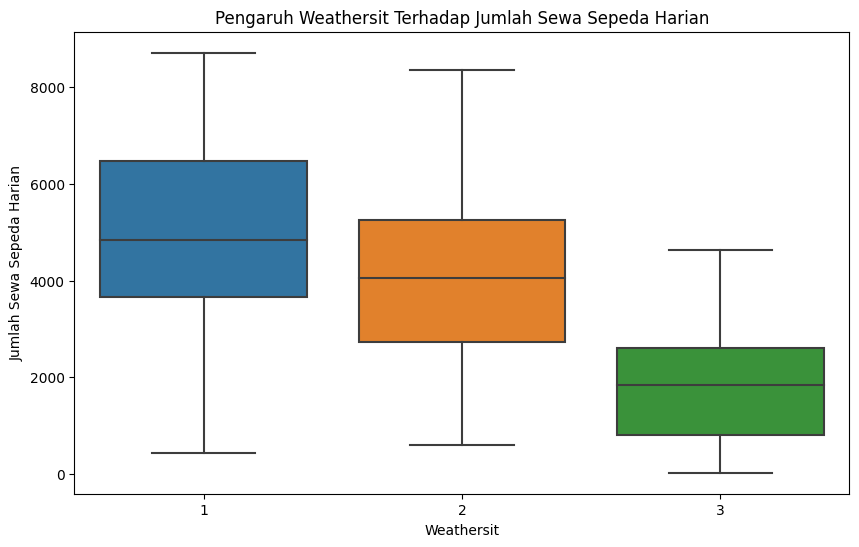

In [25]:
# Pengaruh Weathersit
plt.figure(figsize=(10, 6))
sns.boxplot(x="weathersit_daily", y="cnt_daily", data=bike_sharing)
plt.title("Pengaruh Weathersit Terhadap Jumlah Sewa Sepeda Harian")
plt.xlabel("Weathersit")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

### Pertanyaan 2:
- Bagaimana distribusi jumlah sewa sepeda berdasarkan bulan?

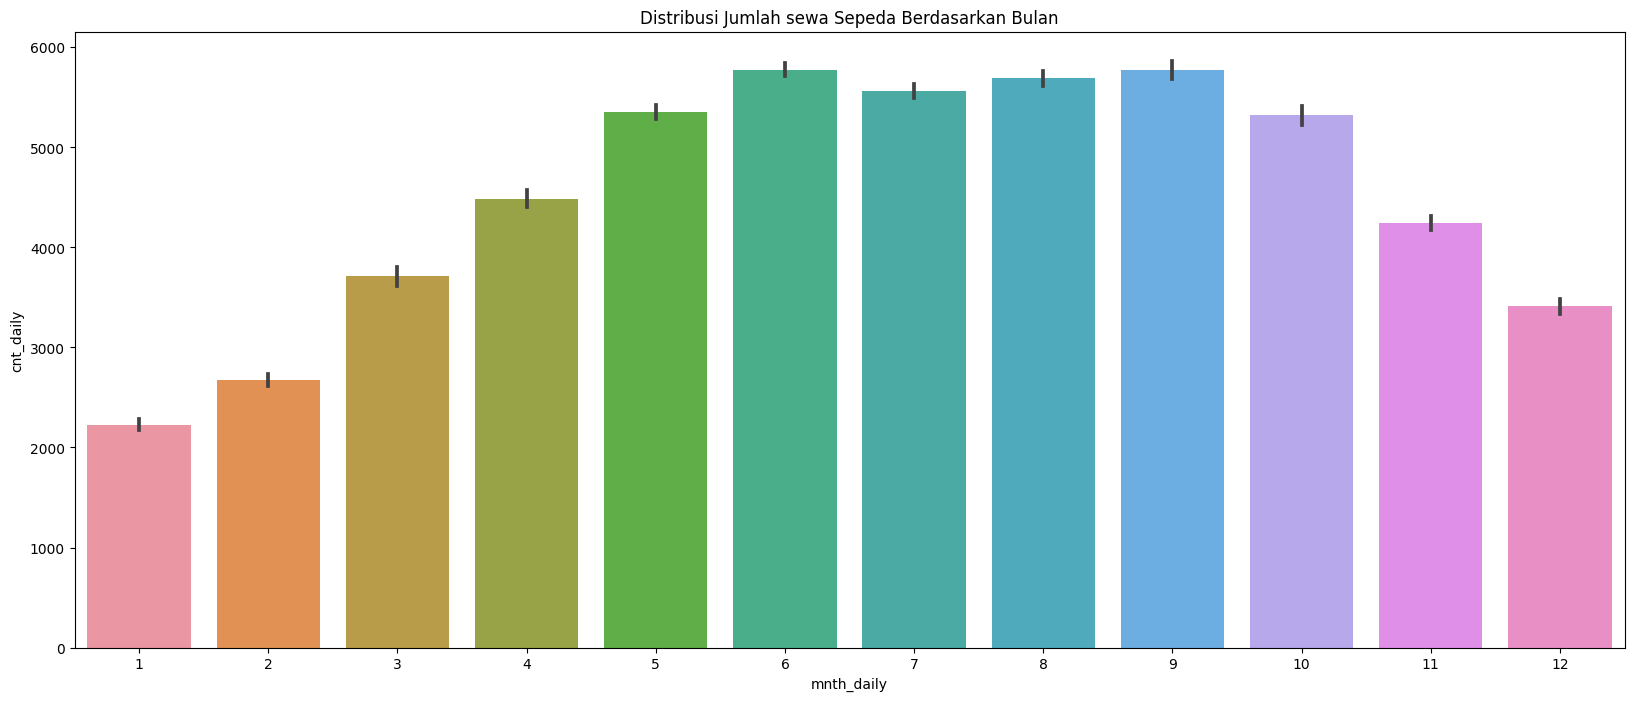

In [26]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(data=bike_sharing, x='mnth_daily', y='cnt_daily', ax=ax)
ax.set(title='Distribusi Jumlah sewa Sepeda Berdasarkan Bulan')
plt.show()

## Conclusion

- Conclution pertanyaan 1:
dapat dilihat untuk jumlah sewa sepeda meningkat ketika cuaca Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian dengan posisi jumlah sewa yang terbanyak.

- Conclution pertanyaan 2:
dapat dilihat dari bulan ke 6 dan 9 adalah bulan dengan jumlah tertinggi dari distribusi sewa sepeda

In [27]:
day_df.to_csv("day_df_clean.csv", index=False)

In [28]:
hour_df.to_csv("hour_df_clean.csv", index=False)